<a href="https://colab.research.google.com/github/alisonsoong/NASA-SEES-Internship-2021/blob/main/EP_SEES_4_Radial_Velocity_Activity_Soong_Alison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alison Soong, EP, Emergency Preparedness

CREDIT: Prof. Raja GuhaThakurta of UCSC and the Science Internship Program
This Python tutorial was originally developed by Dr. Raja GuhaThakurta and his astronomy graduate students as part of the [Science Internship Program (SIP)](http://ucsc-sip.org/about/) for Bay Area high school students at the University of California Santa Cruz (UCSC). Dr. GuhaThakurta's tutorial is called Python and Research (PyaR).

SEES thanks Dr. GuhaThakurta for his generosity in sharing Jupyter notebooks, video tutorials, data, and related resources.

In 2020, a SEES mentor adapted Dr. GuhaThakurta's tutorials to run in the Google Colaboratory. The current notebook has been updated for 2021 SEES.   

## Radial Velocity Activity

In this activity, we will be looking at some plotted spectra and measuring their velocities. As usual, begin by running the first cell to import Matplotlib and NumPy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# we will need to write files again so we import the required 
# files package from google.colab
from google.colab import files

Now, on to the science! The ***data*** subfolder in your ***SIP*** folder contains spectra of 3 stars (text files named 491422_spec.txt, 6004761_spec.txt, and 1757844_spec.txt). Your task is to measure the radial velocities of these stars. 

Modify the shiftToMoving function below so that it converts the template rest wavelength array to a Doppler shifted moving wavelength.
How to do this? You will need to convert a mathematical equation into Python code. First you need to know the equation. NASA and the Internet are your friends here. Specifically NASA's [Goddard Space Flight Center](https://imagine.gsfc.nasa.gov/features/yba/M31_velocity/spectrum/doppler_more.html) offers a great explanation of the Doppler shift and the exact equation for a Doppler shifted wavelength. Your challenge is to convert the formula into Pythonese.

Remember that Lambda is the Greek letter $\lambda$ and the symbol for wavelength. So, $\lambda_{0}$ is resting wavelength (restLamba) while $\lambda^\prime$ is Doppler shifted moving wavelength (newLamba). Velocity is represented by $\upsilon$ and speed, $c_{0}$, will be the speed of light, in this astronomy case. So you will need to know the value for the constant, speed of light. Choose a variable name for $c_{0}$ and assign it the proper value in kilometers per second.

**Note**: Try this on your own. If you cannot figure out how to write the equation, you can watch the notebook 4 tutorial video, 

In [ ]:
def shiftToMoving(restLambda, v):
    """Function to shift a wavelength array using the Doppler equation.
    """
    speedOfLight = 299792.458 # speed of light, km/s
    newLambda = restLambda*(1+v/speedOfLight) 
    return newLambda

Make sure that your code makes sense: If you apply a positive velocity, should the shifted wavelength be longer or shorter than the original wavelength? Does your code reproduce your expectation? Test your code below with my favorite rest wavelength and a few velocities.

How to test the code? Set the variables required to run the shiftToMoving function and 'call' the function - enter it as a command. Can't remember how to do this? Revisit the functions section in ***SEES 1-Python Intro.ipynb***.

In [ ]:
rest_h_alpha = 6563.
# Fill in code here to test shiftToMoving with v = 200 km/s and v = -200 km/s.
print(shiftToMoving(rest_h_alpha, 200))
print(shiftToMoving(rest_h_alpha, -200))
# Name your own velocity variable 
v = 150
print(shiftToMoving(rest_h_alpha, 150))
# Does your answer make sense?


6567.3783623135705
6558.6216376864295
6566.283771735179


Now on to our 3 stars for today's activity. The first step is to pick a science star and a template star and read in the files. Fill in the name of the star in "star_name" (e.g., 6004761, 1757844, or 491422) and pick a template to put in "temp_name" (e.g., MS, RGB, AGB).

In [ ]:
star_name='1757844'
temp_name='AGB'
scienceFile = star_name + '_spec.txt'
templateFile = temp_name+ '_tmpl.txt'

print("Be sure to upload the files named {} and {}\n\n".format(scienceFile, templateFile))

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

sciLambda, sciFlux = np.loadtxt(scienceFile, unpack = True)
tmpLambda, tmpFlux = np.loadtxt(templateFile, unpack = True)


Be sure to upload the files named 1757844_spec.txt and AGB_tmpl.txt




Saving 1757844_spec.txt to 1757844_spec.txt
Saving AGB_tmpl.txt to AGB_tmpl.txt
User uploaded file "1757844_spec.txt" with length 64121 bytes
User uploaded file "AGB_tmpl.txt" with length 63394 bytes


This next line is the key line in the code--it shifts the template velocity to your suggested velocity for the star, and makes a plot showing the two. Put in an intial guess for the velocity of the star and see how it looks!

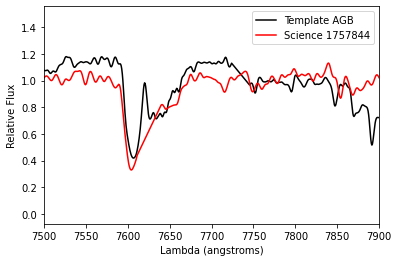

In [ ]:
v_guess=-150.0
#Shift template spectrum using the Doppler equation
new_tmpLambda = shiftToMoving(tmpLambda, v_guess)

#Plot science and template spectra on the same axes.
ax = plt.axes()
ax.plot(new_tmpLambda, tmpFlux, c = 'black', label = 'Template ' + temp_name)
ax.plot(sciLambda, sciFlux, c = 'red', label = 'Science ' + star_name)
# print(sciFlux)
ax.set_xlabel('Lambda (angstroms)')
ax.set_ylabel('Relative Flux')
ax.set_xlim(7500, 7900)
plt.legend()

Does the template look like a good match for this star? Try the other two templates to see which one looks the most like the science star. Do this by editing temp_name above, and then re-run the cell that reads in the files and the cell that shifts the wavelength and makes the plot.

After you're happy with your template, use the command ax.set_xlim(7000, 7200) to zoom in on the region between 7000 and 7200 angstroms. Play with "v_guess" until you're happy with how the two are lined up. Once you're happy with your velocity, write it down--and repeat with the next two science stars! 

# Response requested
### Record your velocities here (double click on this cell to edit):

6004761: Template = AGB, Velocity = -200.0 km/s

1757844: Template = AGB, Velocity = -150.0 km/s

491422:  Template = RGB, Velocity = -260.0 km/s


## Radial Velocity Map of Andromeda

Now that you've successfully measured the velocities of a few stars, let's look at the velocities of all the stars we have in the Andromeda galaxy! First, we need to read in the data file containing our velocities:

In [ ]:
keck_uploaded = files.upload()

for fn in keck_uploaded.keys():
  print('User uploaded file "{name}"'.format(name=fn))

#Read in data
ra, dec, xi, eta, f475w, f814w, v, verr = np.loadtxt('keck_hst_data.txt', 
                                                     unpack = True)

#conversion factor: degrees to kiloparsecs (this is a distance)
deg2kpc = 13.67
xi *= deg2kpc
eta *= deg2kpc

Saving keck_hst_data.txt to keck_hst_data (1).txt
User uploaded file "keck_hst_data.txt"


Now we make the plot showing the positions of the stars and color coding the stars based on their velocities.

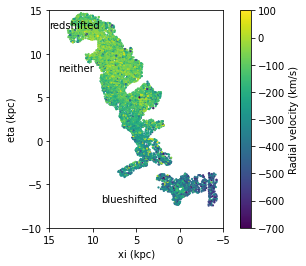

In [ ]:
ax = plt.axes(aspect = 'equal')
ax.set_xlabel('xi (kpc)')
ax.set_ylabel('eta (kpc)')
ax.set_xlim(15, -5)
ax.set_ylim(-10, 15)

# adding labels
ax.text(14, 8, 'neither')
ax.text(15, 13, 'redshifted')
ax.text(9, -7, 'blueshifted')
# the color map (cmap variable) viridis is the default for 
#     matplotlib versions > 2
cc = ax.scatter(xi, eta, c = v, s = 5, edgecolors = 'none', vmin = -700, 
                vmax = 100, cmap='viridis')   

plt.colorbar(cc, label = 'Radial velocity (km/s)')

Edit the code cell above to label parts of the plot as "blueshifted," "redshifted," or "neither," relative to M31's center. You can use the ax.text() command to edit the plot--for example,

ax.text(1, -.5, ‘I am at school late today.’)

Insert the ax.text() statements after setting the x and y limits.

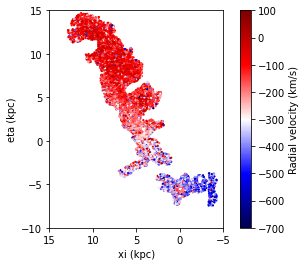

In [ ]:
# Redo the map with a different colorbar that visually
# illustrates red and blue-shifted regions.  For a list
# of all of matplotlib's colormaps see here:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
ax = plt.axes(aspect = 'equal')
ax.set_xlabel('xi (kpc)')
ax.set_ylabel('eta (kpc)')
ax.set_xlim(15, -5)
ax.set_ylim(-10, 15)
cc = ax.scatter(xi, eta, c = v, s = 5, edgecolors = 'none', vmin = -700, vmax = 100,
                cmap='seismic')
plt.colorbar(cc, label = 'Radial velocity (km/s)')

# Question to respond to:

Based on your plot, what is the systemic velocity (average velocity) of Andromeda relative to us?

*Double click or use Markdown pencil icon to start editing.*

The average velocity of Andromeda relative to us is negative and seems to be around -200 km/s. In general, most of the stars in Andromeda are moving towards us (since the velocities are negative). Although a lot of the stars show up as red, they are generally a lighter red that, according to the Radial velocity colorbar, corresponds to the -100 km/s range.

# Preparing for Advanced Level Certificate
When you have successfully completed the code that plots the requested radial velocity maps, you can prepare this notebook for submission. Also be sure to answer questions asked in the appropriate text cells. Your answers demonstrate that you've attempted to interpret the science data. They will not be scored as right or wrong.

Overwrite the title text in the **CREDIT text block** at the top of the notebook. Write **your full name**, **your team code**, and **your specific team name** in the text block instead.

Make sure that your saved notebook shows your output by running all code cells.

Copy or rename notebook 4 in this way:

*   *team code_*SEES 4-Radial Velocity Activity*_last name_first name*.ipynb where:

1.   *team code* is your 2 character SEES team code
2.   *last name* is your last name, and
3.   *first name* is your first name

For example, a team mentor for SEES would name her notebook *EP_SEES 4-Radial Velocity Activity_Howard_Teresa.ipynb*.

Follow the directions in Basecamp to submit your notebook.